In [1]:
from datascience import *
from collections import Counter
import numpy as np
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Data

For this lab, we'll be using the American National Election Studies (ANES) data from the 2016 election. The codebook is available here: http://www.electionstudies.org/studypages/anes_pilot_2016/anes_pilot_2016_CodebookUserGuide.pdf

In [2]:
anes = Table.read_table('../data/anes/anes_pilot_2016.csv')
anes

version,caseid,weight,weight_spss,follow,turnout12,turnout12b,vote12,percent16,meet,givefut,info,march,sign,give12mo,compromise,ftobama,ftblack,ftwhite,fthisp,ftgay,ftjeb,fttrump,ftcarson,fthrc,ftrubio,ftcruz,ftsanders,ftfiorina,ftpolice,ftfem,fttrans,ftmuslim,ftsci,reg,demcand,repcand,vote16jb,vote16bc,vote16tc,vote16mr,vote16dt,presjob,lazyb,lazyw,lazyh,lazym,violentb,violentw,violenth,violentm,econnow,econ12mo,pid1d,pid2d,pid1r,pid2r,pidstr,pidlean,lcself,lcd,lcr,lchc,lcbo,lcdt,lcmr,lctc,ISSUES_OC14_1,ISSUES_OC14_2,ISSUES_OC14_3,ISSUES_OC14_4,ISSUES_OC14_5,ISSUES_OC14_6,ISSUES_OC14_7,ISSUES_OC14_8,ISSUES_OC14_9,ISSUES_OC14_10,ISSUES_OC14_11,ISSUES_OC14_12,ISSUES_OC14_13,ISSUES_OC14_14,ISSUES_OC14_15,ISSUES_OC14_16,ISSUES_OC14_17,ISSUES_OC14_18,ISSUES_OC14_19,ISSUES_OC14_20,ISSUES_OC14_21,best1,best2,best3,best4,disc_b,disc_h,disc_w,disc_g,disc_wo,disc_m,disc_t,disc_mu,disc_c,disc_selfsex,disc_fed,disc_police,srv_spend,campfin,immig_legal,immig_numb,equalpay,parleave,crimespend,death,terror_worry,terror_12mo,terror_local,relig_bc,relig_bcstr,relig_srv,relig_srvstr,incgap20,isis_troops,syrians_a,syrians_b,pc_a,pc_b,minwage,healthspend,childcare,getahead,ladder,finwell,rr1,rr2,rr3,rr4,warm,warmbad,warmcause,warmdo,aa1,aa2,aa3,freetrade,stopwhite,stopblack,forcewhite,forceblack,stop_12mo,arrested_12mo,charged_12mo,jailed_12mo,convict_12mo,famstop_12mo,stop_ever,arrested_ever,charged_ever,jailed_ever,convict_ever,famstop_ever,pk_deficit,pk_sen,pk_spend,birthright_a,birthright_b,femoff_jobs,femoff_ed,femoff_spend,femoff_issues,lpres_pleased,lpres_immig,lpres_la,vaccine,autism,bo_muslim,bo_confid,NFC1,NFC10,NFC15,NFC21,NFC23,NFC24,NFC29,NFC32,NFC40,NTE1,NTE3,NTE9,NTE10,NTE11,NTE12,amer_ident,race_ident,wad1a,wad2a,wad3a,wad4a,wad1b,wad2b,wad3b,wad4b,whitework,whitejob,wguilt1,wguilt2,wguilt3,buycott,boycott,skintone_mob,skintone,skin_discrim,africanam10_1,white10_1,hispanic10_1,asianam10_1,nativeam10_1,other10_1,other10_open,birthyr,gender,race,race_other,educ,marstat,speakspanish,employ,employ_t,faminc,faminc2,state,votereg,pid3,pid7,ideo5,newsint,pew_bornagain,pew_churatd,religpew,religpew_t,page_page_follow_timing,page_page_turnout12_timing,page_page_vote12_timing,page_page_percent16_timing,page_page_meet_timing,page_page_givefut_timing,page_page_info_timing,page_page_march_timing,page_page_sign_timing,page_page_give12mo_timing,page_page_compromise_timing,page_page_ftobama_timing,page_page_ftblack_timing,page_page_ftwhite_timing,page_page_fthisp_timing,page_page_ftgay_timing,page_page_ftjeb_timing,page_page_fttrump_timing,page_page_ftcarson_timing,page_page_fthrc_timing,page_page_ftrubio_timing,page_page_ftcruz_timing,page_page_ftsanders_timing,page_page_ftfiorina_timing,page_page_ftpolice_timing,page_page_ftfem_timing,page_page_fttrans_timing,page_page_ftmuslim_timing,page_page_ftsci_timing,page_page_reg_timing,page_page_demcand_timing,page_page_repcand_timing,page_page_vote16jb_timing,page_page_vote16bc_timing,page_page_vote16tc_timing,page_page_vote16mr_timing,page_page_vote16dt_timing,page_page_presjob_timing,page_page_lazy_timing,page_page_violent_timing,page_page_econ_grid_timing,page_page_pid1d_timing,page_page_pid1r_timing,page_page_pidstr_timing,page_page_pidlean_timing,page_page_lc_grid_timing,page_page_ISSUES_OC14_timing,page_page_GRID_best4_timing,page_page_disc_timing,page_page_disc_selfsex_timing,page_page_disc_fed_timing,page_page_disc_police_timing,page_page_srv_spend_timing,page_page_campfin_timing,page_page_immig_legal_timing,page_page_immig_numb_timing,page_page_equalpay_timing,page_page_parleave_timing,page_page_crimespend_timing,page_page_death_timing,page_page_terror_worry_timing,page_page_terror_12mo_timing,page_page_terror_local_timing,page_page_relig_bc_timing,page_page_relig_srv_timing,page_page_incgap20_timing,page_page_isis_troops_timing,page_page_syrians_a_timing,page_page_syrians_b_timing,page_page_pc_a_timing,page_page_pc_b_timing,page_page_minwage_timing,page_page_healthspend_timing,page_page_chi

## Exploratory Data Analysis

Write code that plots a histogram of the "Feeling Thermometer - Barack Obama" variable. What is the shape of the plot? Report the 25th, 50th, and 75th percentiles. Keep in mind that valid answers have domain [0,100].

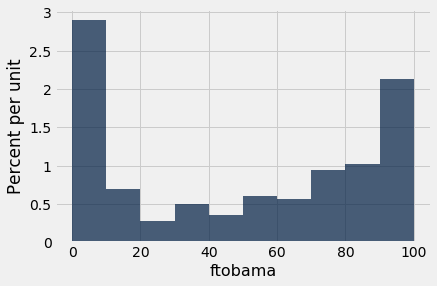

In [3]:
anes.where("ftobama", are.below(101)).hist("ftobama")

In [4]:
obama = anes.where('ftobama', are.below(101)).select("ftobama")
percentile(25, obama.column(0))

5

In [5]:
percentile(50, obama.column(0))

52

In [6]:
percentile(75, obama.column(0))

87

### Question 1

Now do the same for "Feeling Thermometer - Donald Trump." How do the two distributions compare?

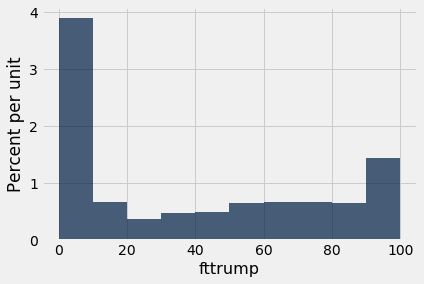

In [7]:
anes.where('fttrump', are.below(101)).hist('fttrump')

In [8]:
trump = anes.where('fttrump', are.below(101)).select('fttrump')
percentile(25, trump.column(0))

2

In [9]:
percentile(50, trump.column(0))

30

In [10]:
percentile(75, trump.column(0))

72

## Bootstrap

Write code that resamples the "ftobama" distribution, then plot a histogram. Be sure resample the number of rows that exist in the dataset, with replacement.

In [11]:
obama.num_rows

1198

In [12]:
resample = obama.sample(1198, with_replacement = True)

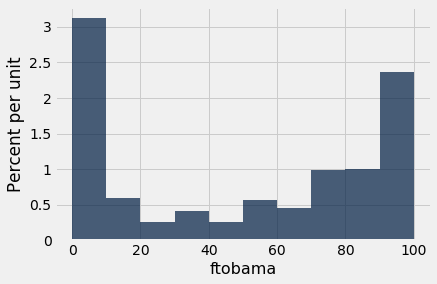

In [13]:
resample.hist('ftobama')

In [14]:
percentile(50, resample.column(0))

56

### Question 2

How does the resampled median compare to the original median? Does this result make sense?

Now, define a function titled "bootstrap_median" that takes the original sample, the column name we're concerned with, and the number of resamples as arguments. The function shold calculate medians and return them in an array.

In [15]:
def bootstrap_median(original_sample, label, replications):
    """Returns an array of bootstrapped sample medians:
    original_sample: table containing the original sample
    label: label of column containing the variable
    replications: number of bootstrap samples
    """
    just_one_column = original_sample.select(label)
    medians = make_array()
    for i in np.arange(replications):
        bootstrap_sample = just_one_column.sample()
        resampled_median = percentile(50, bootstrap_sample.column(0))
        medians = np.append(medians, resampled_median)

    return medians

Replicate the bootstrap 10,000 times, then plot the results.

In [16]:
medians = bootstrap_median(anes, 'ftobama', 10000)

Plot a histogram of the resampled medians, and plot the 95% confidence interval.

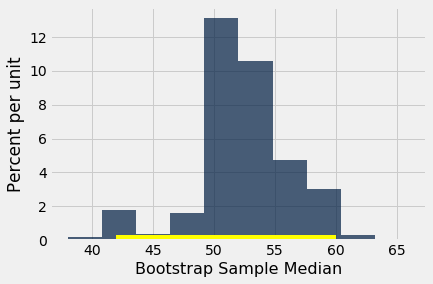

In [20]:
resampled_medians = Table().with_column('Bootstrap Sample Median', medians)
resampled_medians.hist()
plots.plot(make_array(percentile(2.5, medians), percentile(97.5, medians)), make_array(0, 0), color='yellow', lw=10, zorder=1)

### Question 3

What can you infer about the likely population median given the above distribution?

Finally, write a simulation that constructs 100 confidence intervals. 

In [21]:
left_ends = make_array()
right_ends = make_array()

for i in np.arange(100):
    first_sample = obama.sample(500, with_replacement=True)
    medians = bootstrap_median(first_sample, 'ftobama', 5000)
    left_ends = np.append(left_ends, percentile(2.5, medians))
    right_ends = np.append(right_ends, percentile(97.5, medians))

intervals = Table().with_columns(
    'Left', left_ends,
    'Right', right_ends
)

#### Question 4

Finally, plot 100 confidence intervals (stacked on top of each other). What can you conclude about the median?

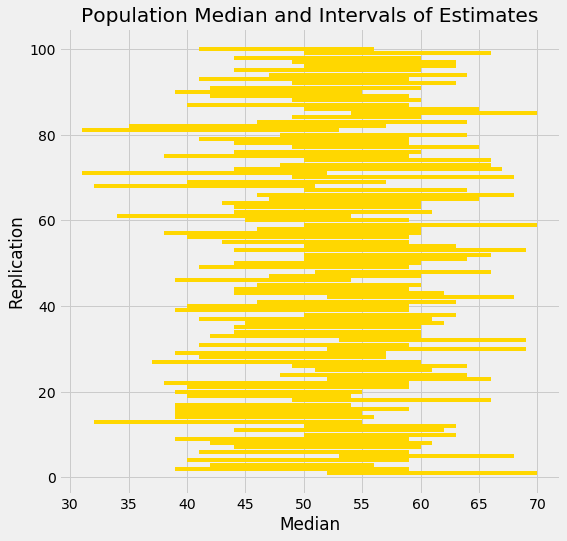

In [22]:
replication_number = np.ndarray.astype(np.arange(1, 101), str)
intervals2 = Table(replication_number).with_rows(make_array(left_ends, right_ends))

plots.figure(figsize=(8,8))
for i in np.arange(100):
    ends = intervals2.column(i)
    plots.plot(ends, make_array(i+1, i+1), color='gold')
plots.xlabel('Median')
plots.ylabel('Replication')
plots.title('Population Median and Intervals of Estimates');